### Importing Required Libraries

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier

### Reading the file

In [2]:
df1=pd.read_csv('train-new.csv',index_col=[13])
df1.shape

(17565, 14)

In [3]:
df2=pd.read_csv('test-new.csv',index_col=[13])
df2.shape

(8652, 13)

In [4]:
df=pd.concat([df1,df2])
df.head()

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageofocc,yearacc,yearveh,abcat,occrole,deploy,injseverity
caseid,,,,,,,,,,,,,,
45:150:1,55+,53.342,dead,airbag,belted,1,f,48,2002,1997.0,deploy,driver,1,3.0
76:40:01,25-39,154.960,alive,none,none,1,m,26,2001,1968.0,unavail,driver,0,3.0
0.586122685,55+,38.994,alive,none,none,1,f,51,2002,1994.0,unavail,driver,0,3.0
9:17:01,25-39,168.568,alive,airbag,belted,1,m,27,1998,1996.0,deploy,pass,1,3.0
2:02:02,24-Oct,27.751,alive,airbag,belted,0,m,26,2002,1997.0,nodeploy,pass,0,0.0


In [5]:
df.shape

(26217, 14)

##### Column 'dvcat' gives a combination of information which mades the column redundant and so can be dropped

In [6]:
df.drop(columns=['dvcat'],inplace=True)

##### 26217 rows and 14 columns

### Treatment of null values

In [7]:
df.isnull().sum()

weight            0
dead              0
airbag            0
seatbelt          0
frontal           0
sex               0
ageofocc          0
yearacc           0
yearveh           1
abcat             0
occrole           0
deploy            0
injseverity    8652
dtype: int64

<AxesSubplot:ylabel='caseid'>

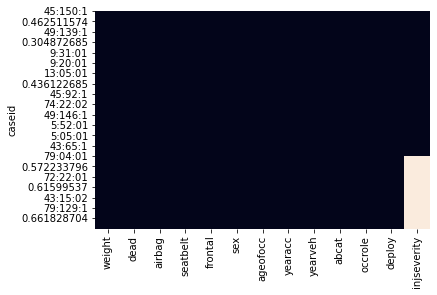

In [8]:
sns.heatmap(df.isnull(),cbar=False)

In [9]:
df['yearveh'].median()

1994.0

In [10]:
df['yearveh'].fillna(df['yearveh'].median(),inplace=True)

In [11]:
df.isnull().sum()

weight            0
dead              0
airbag            0
seatbelt          0
frontal           0
sex               0
ageofocc          0
yearacc           0
yearveh           0
abcat             0
occrole           0
deploy            0
injseverity    8652
dtype: int64

##### 'yearveh' column has 1 null value which is substituted by the mode of the column since year is a categorical variable.

### Information of the dataset

In [12]:
df.head()

,weight,dead,airbag,seatbelt,frontal,sex,ageofocc,yearacc,yearveh,abcat,occrole,deploy,injseverity
caseid,,,,,,,,,,,,,
45:150:1,53.342,dead,airbag,belted,1,f,48,2002,1997.0,deploy,driver,1,3.0
76:40:01,154.960,alive,none,none,1,m,26,2001,1968.0,unavail,driver,0,3.0
0.586122685,38.994,alive,none,none,1,f,51,2002,1994.0,unavail,driver,0,3.0
9:17:01,168.568,alive,airbag,belted,1,m,27,1998,1996.0,deploy,pass,1,3.0
2:02:02,27.751,alive,airbag,belted,0,m,26,2002,1997.0,nodeploy,pass,0,0.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26217 entries, 45:150:1 to 4:32:01
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   weight       26217 non-null  float64
 1   dead         26217 non-null  object 
 2   airbag       26217 non-null  object 
 3   seatbelt     26217 non-null  object 
 4   frontal      26217 non-null  int64  
 5   sex          26217 non-null  object 
 6   ageofocc     26217 non-null  int64  
 7   yearacc      26217 non-null  int64  
 8   yearveh      26217 non-null  float64
 9   abcat        26217 non-null  object 
 10  occrole      26217 non-null  object 
 11  deploy       26217 non-null  int64  
 12  injseverity  17565 non-null  float64
dtypes: float64(3), int64(4), object(6)
memory usage: 2.8+ MB


##### The  variables with wrong datatypes need to be fixed

In [14]:
df['frontal']=df['frontal'].astype('object')
df['deploy']=df['deploy'].astype('object')


In [15]:
df['yearacc']=df['yearacc'].astype('object')
df['yearveh']=df['yearveh'].astype('object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26217 entries, 45:150:1 to 4:32:01
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   weight       26217 non-null  float64
 1   dead         26217 non-null  object 
 2   airbag       26217 non-null  object 
 3   seatbelt     26217 non-null  object 
 4   frontal      26217 non-null  object 
 5   sex          26217 non-null  object 
 6   ageofocc     26217 non-null  int64  
 7   yearacc      26217 non-null  object 
 8   yearveh      26217 non-null  object 
 9   abcat        26217 non-null  object 
 10  occrole      26217 non-null  object 
 11  deploy       26217 non-null  object 
 12  injseverity  17565 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 2.8+ MB


### Exploratory Data Analysis

In [17]:
df.describe()

,weight,ageofocc,injseverity
count,26217.000000,26217.000000,17565.000000
mean,462.811611,37.206202,1.713066
std,1524.844430,17.909317,1.290565
min,0.000000,16.000000,0.000000
25%,32.467000,22.000000,1.000000
50%,86.986000,33.000000,2.000000
75%,364.717000,48.000000,3.000000
max,57871.595000,97.000000,6.000000


##### The mean,min,max,25%,75% values tells us if there are any outliers in the dataset

In [18]:
df_num=df.select_dtypes(np.number)

<AxesSubplot:>

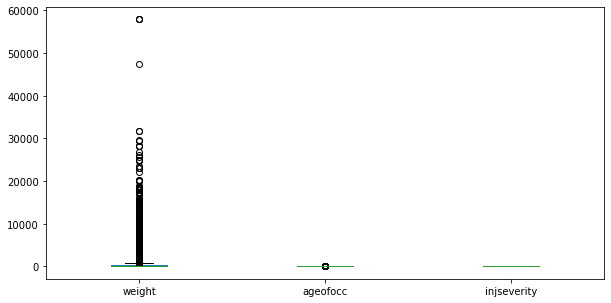

In [19]:
df_num.plot(kind='box',figsize=(10,5))

##### The column weight has a high number of outliers in them.

In [20]:
df.describe(include='object')

,dead,airbag,seatbelt,frontal,sex,yearacc,yearveh,abcat,occrole,deploy
count,26217,26217,26217,26217,26217,26217,26217.0,26217,26217,26217
unique,2,2,2,2,2,6,45.0,3,2,2
top,alive,airbag,belted,1,m,2002,1995.0,unavail,driver,0
freq,25037,14419,18573,16866,13969,4764,2037.0,11798,20601,17381


##### There are 12 categorical variables including the target variables 'injseverity'. 
##### The number of classes of each categorical variable can be seen
##### The particular class giving the most count with its frequency value of each categorical variable can be seeen.

In [21]:
df_cat=df.select_dtypes(np.object)
df.head()

,weight,dead,airbag,seatbelt,frontal,sex,ageofocc,yearacc,yearveh,abcat,occrole,deploy,injseverity
caseid,,,,,,,,,,,,,
45:150:1,53.342,dead,airbag,belted,1,f,48,2002,1997,deploy,driver,1,3.0
76:40:01,154.960,alive,none,none,1,m,26,2001,1968,unavail,driver,0,3.0
0.586122685,38.994,alive,none,none,1,f,51,2002,1994,unavail,driver,0,3.0
9:17:01,168.568,alive,airbag,belted,1,m,27,1998,1996,deploy,pass,1,3.0
2:02:02,27.751,alive,airbag,belted,0,m,26,2002,1997,nodeploy,pass,0,0.0


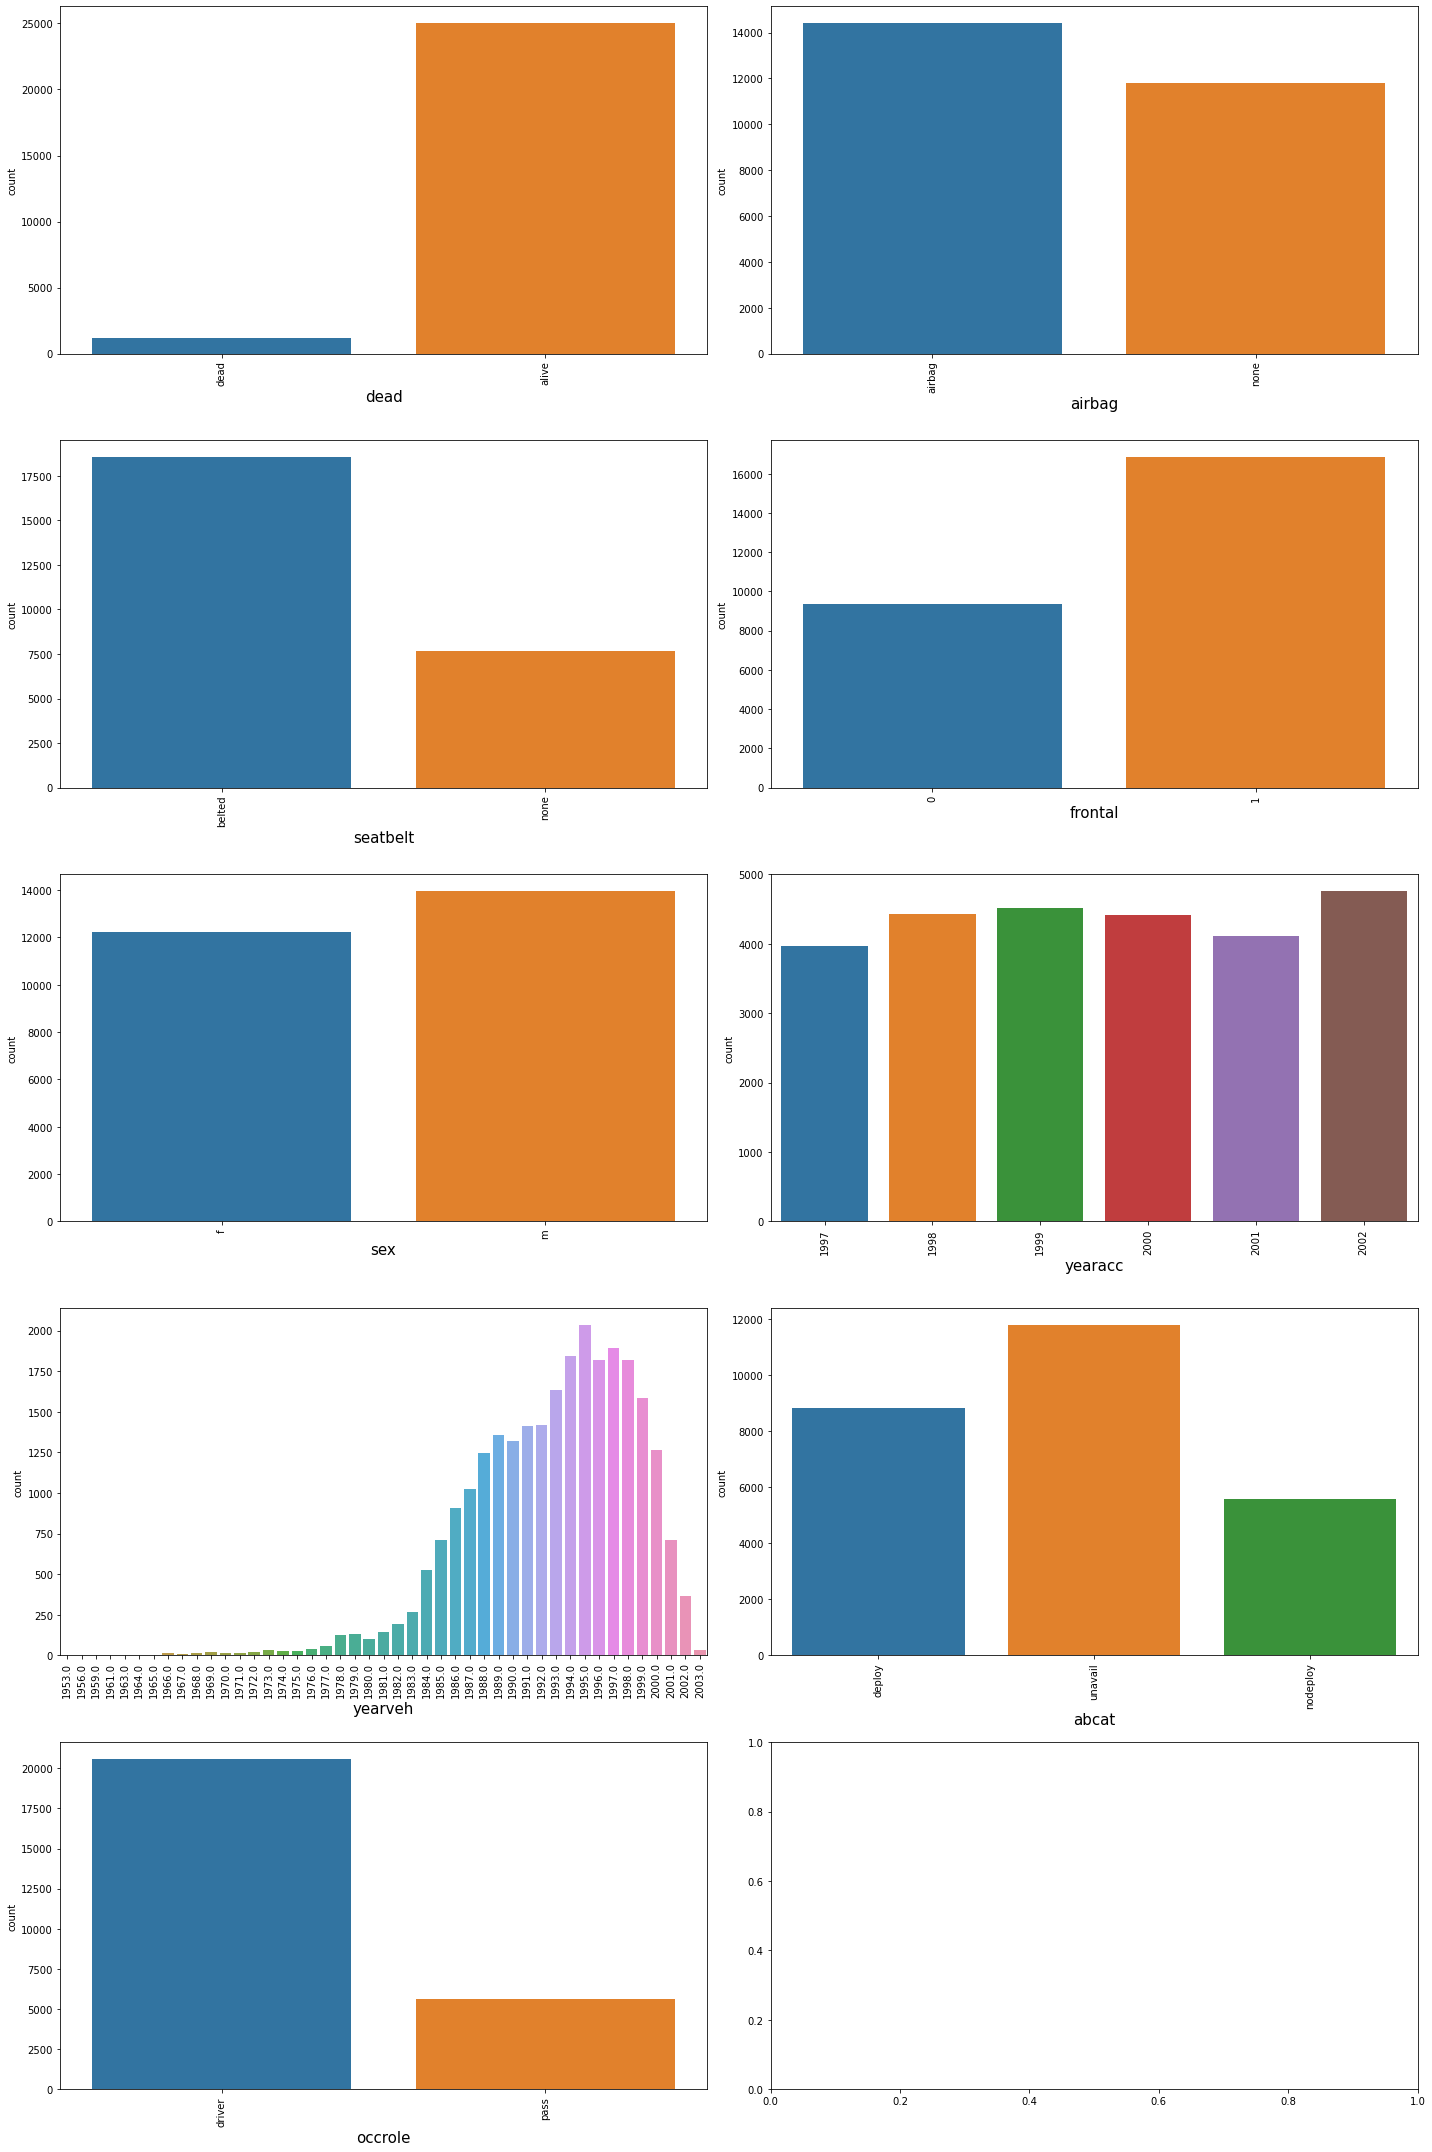

In [22]:
fig,ax=plt.subplots(5,2,figsize=(20,30))
for variable,subplot in zip(df_cat.columns[:-1],ax.flatten()):
    z = sns.countplot(df[variable], ax=subplot) 
    z.set_xticklabels(z.get_xticklabels(),rotation="90")
    z.set_xlabel(variable, fontsize = 15)
plt.tight_layout()
plt.show()


##### Most of the people who met with an accident were alive.
##### Most of the cars had airbags in them.
##### In most cases, the person driving had his belt on.
##### The people in the front of the car were  the ones injured
##### Most of the people injured were Male.
##### Highest number of accidents occured in 2002
##### The driver was the person who was most injured than the pasenger.
##### In most cases, the airbags in the cars were not deployed, one of the reasons for this could be the unavailability of airbags in the car.


### The association of independent variables with the target variable.

<AxesSubplot:xlabel='injseverity', ylabel='ageofocc'>

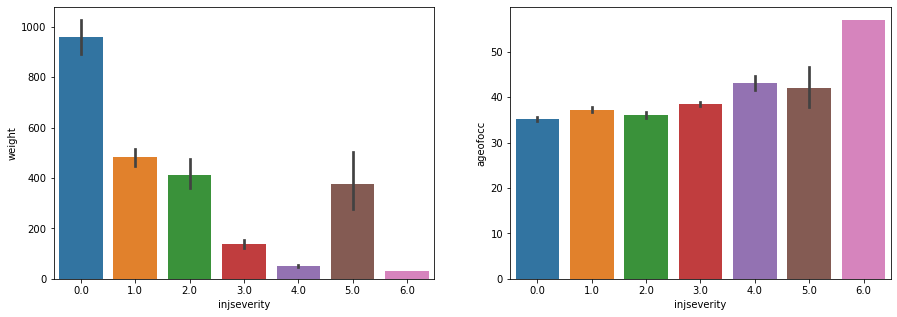

In [23]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot(df['injseverity'],df['weight'],ax=ax[0])
sns.barplot(df['injseverity'],df['ageofocc'],ax=ax[1])

##### The people with very large weight had the lowest severity of injury
##### In case of age, the people with age above 50, had the most severe injury.

<AxesSubplot:xlabel='injseverity', ylabel='dead'>

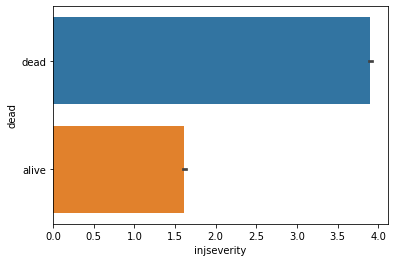

In [24]:
sns.barplot(df['injseverity'],df['dead'])

### Encoing Categorical variables

In [25]:
df_cat.head()

,dead,airbag,seatbelt,frontal,sex,yearacc,yearveh,abcat,occrole,deploy
caseid,,,,,,,,,,
45:150:1,dead,airbag,belted,1,f,2002,1997,deploy,driver,1
76:40:01,alive,none,none,1,m,2001,1968,unavail,driver,0
0.586122685,alive,none,none,1,f,2002,1994,unavail,driver,0
9:17:01,alive,airbag,belted,1,m,1998,1996,deploy,pass,1
2:02:02,alive,airbag,belted,0,m,2002,1997,nodeploy,pass,0


In [26]:
df_cat_1=df_cat.iloc[:,[0,1,2,4,7,8]]
df_cat_1

,dead,airbag,seatbelt,sex,abcat,occrole
caseid,,,,,,
45:150:1,dead,airbag,belted,f,deploy,driver
76:40:01,alive,none,none,m,unavail,driver
0.586122685,alive,none,none,f,unavail,driver
9:17:01,alive,airbag,belted,m,deploy,pass
2:02:02,alive,airbag,belted,m,nodeploy,pass
...,...,...,...,...,...,...
0.299328704,alive,airbag,none,m,nodeploy,driver
76:57:02,alive,airbag,none,f,deploy,pass
74:65:1,alive,airbag,belted,m,deploy,driver


In [27]:
ec=OneHotEncoder()
enc=ec.fit_transform(df_cat_1).toarray()
encoded_data=pd.DataFrame(enc,columns=['alive','dead','airbag','no_airbag','belted','not_belted','female','male','deploy','no_deploy','unavailable_deploy','driver','passenger'],index=df_cat_1.index)
encoded_data.head()

,alive,dead,airbag,no_airbag,belted,not_belted,female,male,deploy,no_deploy,unavailable_deploy,driver,passenger
caseid,,,,,,,,,,,,,
45:150:1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
76:40:01,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
0.586122685,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
9:17:01,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2:02:02,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [28]:
df_cat_2=df_cat.iloc[:,[5,6]]
lb=df_cat_2.apply(LabelEncoder().fit_transform)
lb.head()

,yearacc,yearveh
caseid,,
45:150:1,5,38
76:40:01,4,9
0.586122685,5,35
9:17:01,1,37
2:02:02,5,38


### Scaling numerical variables

In [29]:
df_num.head()

,weight,ageofocc,injseverity
caseid,,,
45:150:1,53.342,48,3.0
76:40:01,154.960,26,3.0
0.586122685,38.994,51,3.0
9:17:01,168.568,27,3.0
2:02:02,27.751,26,0.0


In [30]:
df_num.drop(columns=['injseverity'],inplace=True)

In [31]:
sc=StandardScaler()
sc.fit(df_num)

StandardScaler()

In [32]:
scaled=sc.transform(df_num)
scaled_data=pd.DataFrame(scaled,columns=df_num.columns,index=df_num.index)
scaled_data.head()

,weight,ageofocc
caseid,,
45:150:1,-0.268537,0.602703
76:40:01,-0.201894,-0.625731
0.586122685,-0.277947,0.770217
9:17:01,-0.192970,-0.569893
2:02:02,-0.285320,-0.625731


In [33]:
data=pd.concat([encoded_data,lb,scaled_data,df.iloc[:,[-1]]],axis=1)
data.head()

,alive,dead,airbag,no_airbag,belted,not_belted,female,male,deploy,no_deploy,unavailable_deploy,driver,passenger,yearacc,yearveh,weight,ageofocc,injseverity
caseid,,,,,,,,,,,,,,,,,,
45:150:1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,5,38,-0.268537,0.602703,3.0
76:40:01,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,4,9,-0.201894,-0.625731,3.0
0.586122685,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,5,35,-0.277947,0.770217,3.0
9:17:01,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1,37,-0.192970,-0.569893,3.0
2:02:02,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,5,38,-0.285320,-0.625731,0.0


### Splitting data into train and test to build a model

In [34]:
X=data.iloc[:17565,:-1]
y=data.iloc[:17565,[-1]]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3)

### Defining functions to obtain scores

In [35]:
def conf(model):
    y_pred=model.predict(X_test)
    cm=confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,fmt='d',annot=True,cmap=ListedColormap('lightblue'),linewidths=2,cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

In [36]:
score_card=pd.DataFrame(columns=['Model Name','Accuracy Test','F1 Test'])
def update_score_card(algo,model):

        y_pred_test=model.predict(X_test)
        global score_card

    
    
        score_card=score_card.append({'Model Name':algo,"Accuracy Test":accuracy_score(y_test,y_pred_test)
                                  ,"F1 Test":f1_score(y_test,y_pred_test,average='weighted')}
                                 ,ignore_index=True)
        return score_card
    

### Building Base Model using Naive Bayes

In [37]:
knn_base=KNeighborsClassifier()
knn_base.fit(X_train,y_train)


KNeighborsClassifier()

In [38]:
y_pred=knn_base.predict(X_test)

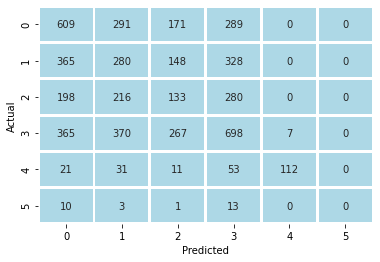

In [39]:
conf(knn_base)

In [40]:
y_p=knn_base.predict(X_train)

In [41]:
accuracy_score(y_train,y_p)

0.5538023586823912

In [42]:
precision_score(y_train,y_p,average='weighted')

0.5520525488028089

In [43]:
update_score_card("Knn (base model)",knn_base)

,Model Name,Accuracy Test,F1 Test
0,Knn (base model),0.347628,0.34785


### Predicting the test data classes using base model

In [44]:
X_train=data.iloc[:17565,:-1]
y_train=data.iloc[:17565,[-1]]
X_test=data.iloc[17565:,:-1]


In [45]:
knn_pred1=knn_base.predict(X_test)

##### Using only significant variables

<AxesSubplot:>

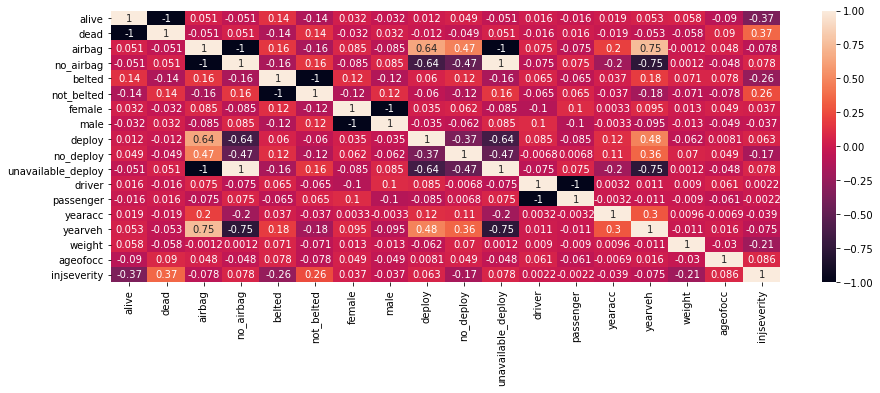

In [46]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),annot=True)

##### Dropping columns airbag,no_airbag  as it has high multi-collinearity.

In [47]:
data.drop(columns=['airbag','no_airbag'],inplace=True)

<AxesSubplot:>

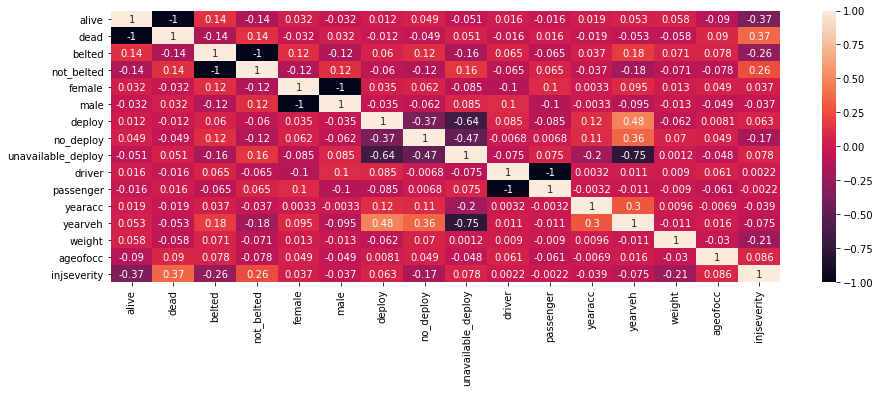

In [48]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),annot=True)

##### The column unavailable deployement is correlated with yearveh which means the year the car was manufactured plays a role in the availabilty of air bags and its deployment during accidents. So the one of the columns can be removed

In [49]:
data.drop(columns=['unavailable_deploy'],inplace=True)

<AxesSubplot:>

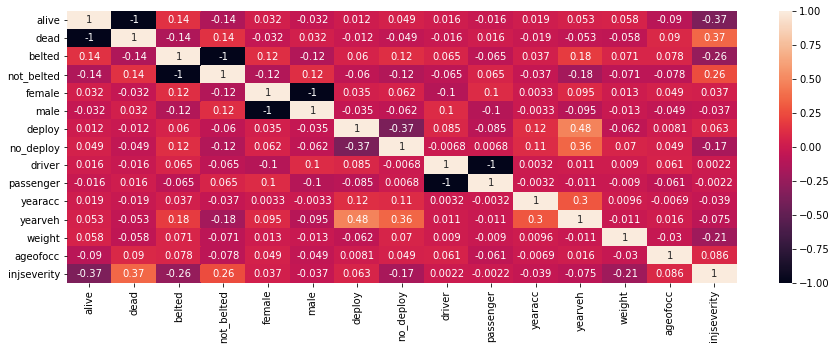

In [50]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),annot=True)

##### Multi-collinearity has been removed

##### Building a knn  model after removing multi-collinearity

In [51]:
X=data.iloc[:17565,:-1]
y=data.iloc[:17565,[-1]]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3)

In [52]:
knn_sig=KNeighborsClassifier()
knn_sig.fit(X_train,y_train)

KNeighborsClassifier()

In [53]:
y_pred=knn_sig.predict(X_test)

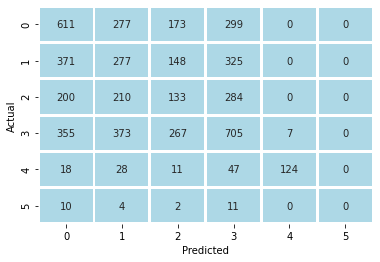

In [54]:
conf(knn_sig)

In [55]:
y_p=knn_sig.predict(X_train)

In [56]:
accuracy_score(y_train,y_p)

0.554209028060187

In [57]:
precision_score(y_train,y_p,average='weighted')

0.5519316703863008

In [58]:
update_score_card("Knn model using significant features",knn_sig)

,Model Name,Accuracy Test,F1 Test
0,Knn (base model),0.347628,0.347850
1,Knn model using significant features,0.351044,0.351103


### Predicting the test data classes using knn model with signifant features

In [59]:
X_train=data.iloc[:17565,:-1]
y_train=data.iloc[:17565,[-1]]
X_test=data.iloc[17565:,:-1]

In [60]:
knn_pred2=knn_sig.predict(X_test)

In [61]:
pd.DataFrame(knn_pred2,columns=['injseverity'],index=X_test.index).to_csv('Sub_2.csv')

##### Finding the optimal value for n_nearest neighbors using GridSearch

##### Building knn model using n_neighbors=22

In [62]:
X=data.iloc[:17565,:-1]
y=data.iloc[:17565,[-1]]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3)
knn_22=KNeighborsClassifier(n_neighbors=22)
knn_22.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=22)

In [63]:
y_pred=knn_22.predict(X_test)

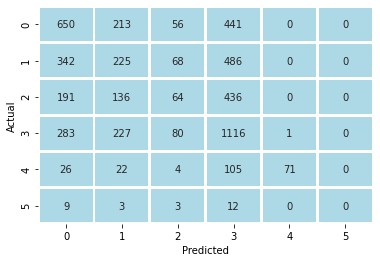

In [64]:
conf(knn_22)

In [65]:
y_p=knn_22.predict(X_train)

In [66]:
accuracy_score(y_train,y_p)

0.4473363155754372

In [67]:
precision_score(y_train,y_p,average='weighted')

0.4398804285804183

In [68]:
update_score_card("Knn model using GridSearch",knn_22)

,Model Name,Accuracy Test,F1 Test
0,Knn (base model),0.347628,0.347850
1,Knn model using significant features,0.351044,0.351103
2,Knn model using GridSearch,0.403416,0.373144


### Predicting the test data classes using knn model after Gridsearch

In [69]:
X_train=data.iloc[:17565,:-1]
y_train=data.iloc[:17565,[-1]]
X_test=data.iloc[17565:,:-1]

In [70]:
knn_pred3=knn_22.predict(X_test)

##### Removing Outliers from the data

In [71]:
data1=data.iloc[:17565,:]
data1=data1[~((data1[['weight','ageofocc']]>3)|(data1[['weight','ageofocc']]<-3)).any(axis=1)]
data1.head()

,alive,dead,belted,not_belted,female,male,deploy,no_deploy,driver,passenger,yearacc,yearveh,weight,ageofocc,injseverity
caseid,,,,,,,,,,,,,,,
45:150:1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5,38,-0.268537,0.602703,3.0
76:40:01,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,4,9,-0.201894,-0.625731,3.0
0.586122685,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,5,35,-0.277947,0.770217,3.0
9:17:01,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1,37,-0.192970,-0.569893,3.0
2:02:02,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,5,38,-0.285320,-0.625731,0.0


In [72]:
data1.shape

(17303, 15)

##### Removing outliers using z_score method

### Building knn model after removing outliers

In [73]:
X=data1.iloc[:17303,:-1]
y=data1.iloc[:17303,[-1]]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3)

In [74]:
knn_out=KNeighborsClassifier(n_neighbors=22)
knn_out.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=22)

In [75]:
y_pred=knn_out.predict(X_test)

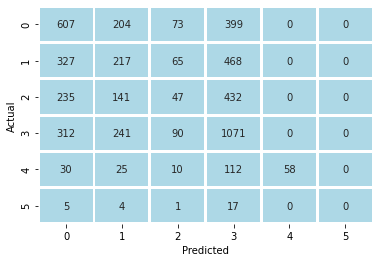

In [76]:
conf(knn_out)

In [77]:
y_p=knn_out.predict(X_train)

In [78]:
accuracy_score(y_train,y_p)

0.45673712021136065

In [79]:
precision_score(y_train,y_p,average='weighted')

0.44587335319810556

In [80]:
update_score_card("Knn model after removing Outliers",knn_out)

,Model Name,Accuracy Test,F1 Test
0,Knn (base model),0.347628,0.347850
1,Knn model using significant features,0.351044,0.351103
2,Knn model using GridSearch,0.403416,0.373144
3,Knn model after removing Outliers,0.385282,0.353735


### Predicting the test data classes using knn model after removing outliers

In [81]:
X_train=data1.iloc[:17565,:-1]
y_train=data1.iloc[:17565,[-1]]
X_test=data.iloc[17565:,:-1]


In [82]:
knn_pred4=knn_out.predict(X_test)

##### Knn model after Smote 

In [91]:
X=data1.iloc[:17303,:-1]
y=data1.iloc[:17303,[-1]]
y.value_counts()

injseverity
3.0            5696
0.0            4230
1.0            3684
2.0            2875
4.0             728
5.0              89
6.0               1
dtype: int64

<AxesSubplot:xlabel='injseverity', ylabel='count'>

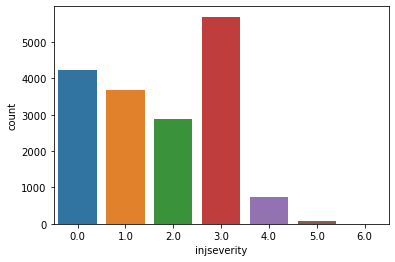

In [109]:
sns.countplot(y['injseverity'])

##### Random Forest

In [126]:
X=data.iloc[:17565,:-1]
y=data.iloc[:17565,[-1]]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3)
rf=RandomForestClassifier(random_state=10)
rf.fit(X_train,y_train)


RandomForestClassifier(random_state=10)

In [120]:
y_pred=rf.predict(X_test)

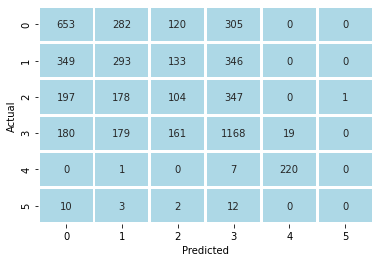

In [121]:
conf(rf)

In [122]:
y_p=rf.predict(X_train)

In [123]:
accuracy_score(y_train,y_p)

0.9992679951199674

In [124]:
precision_score(y_train,y_p,average='weighted')

0.9992683029152816

In [127]:
update_score_card("Random Forest using significant features",rf)

,Model Name,Accuracy Test,F1 Test
0,Knn (base model),0.347628,0.347850
1,Knn model using significant features,0.351044,0.351103
2,Knn model using GridSearch,0.403416,0.373144
3,Knn model after removing Outliers,0.385282,0.353735
4,Random Forest using significant features,0.462619,0.442606


##### Highly overfitted model.

### Predicting the test data classes using random forest model using significant features

In [129]:
X_train=data1.iloc[:17565,:-1]
y_train=data1.iloc[:17565,[-1]]
X_test=data.iloc[17565:,:-1]

In [130]:
rf1=rf.predict(X_test)

In [131]:
pd.DataFrame(rf1,columns=['injseverity'],index=X_test.index).to_csv('Sub5.csv')

### Building random forest model after getting parameters using Gridsearch

In [137]:
print("Best features for random forest model:",rf_grid.best_params_)

{'max_depth': 7, 'max_features': 7, 'n_estimators': 58}

In [139]:
X=data.iloc[:17565,:-1]
y=data.iloc[:17565,[-1]]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3)
rf2=RandomForestClassifier(max_depth=7,max_features=7,n_estimators=58,random_state=10)
rf2.fit(X_train,y_train)


RandomForestClassifier(max_depth=7, max_features=7, n_estimators=58,
                       random_state=10)

In [140]:
y_pred=rf2.predict(X_test)

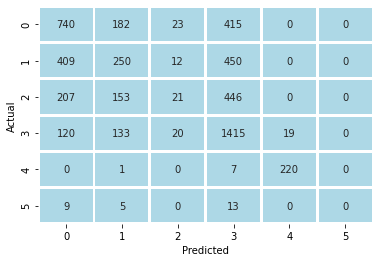

In [141]:
conf(rf2)

In [142]:
y_p=rf2.predict(X_train)

In [143]:
accuracy_score(y_train,y_p)

0.5137047580317202

In [144]:
precision_score(y_train,y_p,average='weighted')

0.4964702204897306

In [145]:
update_score_card("Random Forest using Grid Search",rf2)

,Model Name,Accuracy Test,F1 Test
0,Knn (base model),0.347628,0.347850
1,Knn model using significant features,0.351044,0.351103
2,Knn model using GridSearch,0.403416,0.373144
3,Knn model after removing Outliers,0.385282,0.353735
4,Random Forest using significant features,0.462619,0.442606
5,Random Forest using Grid Search,0.502087,0.445808


##### Overfitting has reduced drastically from the previous model, after tuning the hyperparameters.

### Predicting the test data classes using random forest model using Grid Search

In [146]:
X_train=data1.iloc[:17565,:-1]
y_train=data1.iloc[:17565,[-1]]
X_test=data.iloc[17565:,:-1]

In [147]:
rf2=rf2.predict(X_test)

In [148]:
pd.DataFrame(rf2,columns=['injseverity'],index=X_test.index).to_csv('Sub6.csv')

### Adaboost base model

In [150]:
X=data1.iloc[:17303,:-1]
y=data1.iloc[:17303,[-1]]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3)
ada=AdaBoostClassifier(random_state=10)
ada.fit(X_train,y_train)

AdaBoostClassifier(random_state=10)

In [151]:
y_pred=ada.predict(X_test)

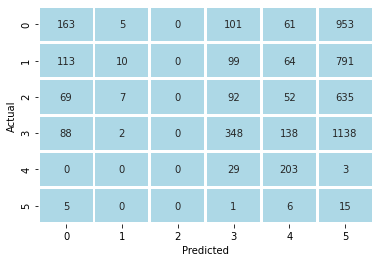

In [152]:
conf(ada)

In [153]:
y_p=ada.predict(X_train)

In [154]:
accuracy_score(y_train,y_p)

0.12954095112285338

In [155]:
precision_score(y_train,y_p,average='weighted')

0.3351085482557033

In [156]:
update_score_card("Ada Boost Base Model",ada)

,Model Name,Accuracy Test,F1 Test
0,Knn (base model),0.347628,0.347850
1,Knn model using significant features,0.351044,0.351103
2,Knn model using GridSearch,0.403416,0.373144
3,Knn model after removing Outliers,0.385282,0.353735
4,Random Forest using significant features,0.462619,0.442606
5,Random Forest using Grid Search,0.502087,0.445808
6,Ada Boost Base Model,0.142362,0.171243


### Ada boost model after tuning hyper parameters.

In [160]:
X=data1.iloc[:17303,:-1]
y=data1.iloc[:17303,[-1]]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3)
tuned_param=[{"learning_rate":[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]}]
ada=AdaBoostClassifier(random_state=10)
ada_grid=GridSearchCV(estimator=ada,param_grid=tuned_param)
ada_grid.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(random_state=10),
             param_grid=[{'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                            0.07, 0.08, 0.09, 0.1]}])

In [161]:
print("Best parameters for ada boost model:",ada_grid.best_params_)

Best parameters for ada boost model: {'learning_rate': 0.02}


In [164]:
X=data1.iloc[:17303,:-1]
y=data1.iloc[:17303,[-1]]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3)
ada2=AdaBoostClassifier(learning_rate=0.02,random_state=10)
ada2.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.02, random_state=10)

In [165]:
y_pred=ada2.predict(X_test)

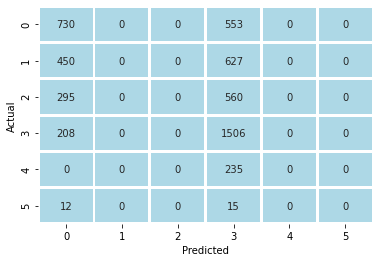

In [166]:
conf(ada2)

In [167]:
y_p=ada2.predict(X_train)

In [168]:
accuracy_score(y_train,y_p)

0.43683949801849403

In [169]:
precision_score(y_train,y_p,average='weighted')

0.2498714194702374

In [170]:
update_score_card("Ada Boost Model after Grid Search",ada2)

,Model Name,Accuracy Test,F1 Test
0,Knn (base model),0.347628,0.347850
1,Knn model using significant features,0.351044,0.351103
2,Knn model using GridSearch,0.403416,0.373144
3,Knn model after removing Outliers,0.385282,0.353735
4,Random Forest using significant features,0.462619,0.442606
5,Random Forest using Grid Search,0.502087,0.445808
6,Ada Boost Base Model,0.142362,0.171243
7,Ada Boost Model after Grid Search,0.430746,0.312060


### Predicting the test data classes using ada boost model using Grid Search

In [171]:
X_train=data1.iloc[:17565,:-1]
y_train=data1.iloc[:17565,[-1]]
X_test=data.iloc[17565:,:-1]

In [172]:
ada2=ada2.predict(X_test)

In [173]:
pd.DataFrame(ada2,columns=['injseverity'],index=X_test.index).to_csv('Sub7.csv')

### XG Boost

In [175]:
X=data1.iloc[:17303,:-1]
y=data1.iloc[:17303,[-1]]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3)
xgb1=XGBClassifier()
xgb1.fit(X_train,y_train)

[19:55:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [176]:
y_pred=xgb1.predict(X_test)

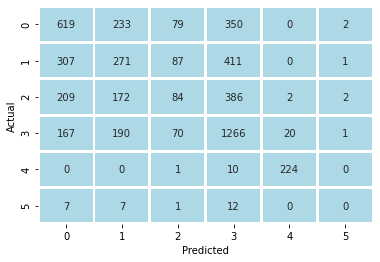

In [177]:
conf(xgb1)

In [178]:
y_p=xgb1.predict(X_train)

In [179]:
accuracy_score(y_train,y_p)

0.7054161162483488

In [180]:
precision_score(y_train,y_p,average='weighted')

0.7262868217929691

In [181]:
update_score_card("XG Boost Model ",xgb1)

,Model Name,Accuracy Test,F1 Test
0,Knn (base model),0.347628,0.347850
1,Knn model using significant features,0.351044,0.351103
2,Knn model using GridSearch,0.403416,0.373144
3,Knn model after removing Outliers,0.385282,0.353735
4,Random Forest using significant features,0.462619,0.442606
5,Random Forest using Grid Search,0.502087,0.445808
6,Ada Boost Base Model,0.142362,0.171243
7,Ada Boost Model after Grid Search,0.430746,0.312060
8,XG Boost Model,0.474668,0.442893


##### Overfitting Model 

##### Predicting the test data classes using XGB base model

In [182]:
X_train=data1.iloc[:17565,:-1]
y_train=data1.iloc[:17565,[-1]]
X_test=data.iloc[17565:,:-1]

In [184]:
xgb1=xgb1.predict(X_test)

In [185]:
pd.DataFrame(xgb1,columns=['injseverity'],index=X_test.index).to_csv('Sub8.csv')

### Tuning Hyperparameters of XGB Model

In [186]:
X=data1.iloc[:17303,:-1]
y=data1.iloc[:17303,[-1]]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3)
tuned_param=[{"learning_rate":[0.03,0.05,0.07,0.09],"max_depth":[2,4,6,8]}]
xgb=XGBClassifier()
xgb_grid=GridSearchCV(estimator=xgb,param_grid=tuned_param,cv=3)
xgb_grid.fit(X_train,y_train)

[20:04:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[20:05:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:05:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:05:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:05:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [187]:
print("Best parameters for xgb:",xgb_grid.best_params_)

Best parameters for xgb: {'learning_rate': 0.09, 'max_depth': 2}


In [213]:
X=data1.iloc[:17303,:-1]
y=data1.iloc[:17303,[-1]]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3)

xgb2=XGBClassifier(learning_rate=0.09,max_depth=2)
xgb2.fit(X_train,y_train)

[20:13:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.09, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [214]:
y_pred=xgb2.predict(X_test)

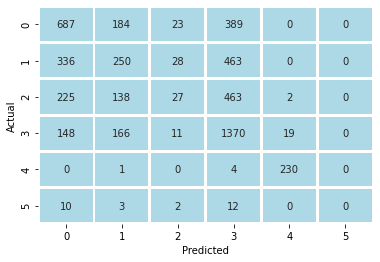

In [215]:
conf(xgb2)

In [216]:
y_p=xgb2.predict(X_train)

In [217]:
accuracy_score(y_train,y_p)

0.5052014531043593

In [206]:
precision_score(y_train,y_p,average='weighted')

0.47913535478368324

In [207]:
update_score_card("XG Boost Model after Gridsearch ",xgb2)

,Model Name,Accuracy Test,F1 Test
0,Knn (base model),0.347628,0.347850
1,Knn model using significant features,0.351044,0.351103
2,Knn model using GridSearch,0.403416,0.373144
3,Knn model after removing Outliers,0.385282,0.353735
4,Random Forest using significant features,0.462619,0.442606
5,Random Forest using Grid Search,0.502087,0.445808
6,Ada Boost Base Model,0.142362,0.171243
7,Ada Boost Model after Grid Search,0.430746,0.312060
8,XG Boost Model,0.474668,0.442893
9,XG Boost Model after Gridsearch,0.493932,0.440489


##### Predicting the test data classes using XGB base model after GridSearch

In [218]:
X_train=data1.iloc[:17565,:-1]
y_train=data1.iloc[:17565,[-1]]
X_test=data.iloc[17565:,:-1]

In [219]:
xgb2=xgb2.predict(X_test)

In [221]:
pd.DataFrame(xgb2,columns=['injseverity'],index=X_test.index).to_csv('Sub_9.csv')